<div style="text-align: center; font-size: 36px;">
    Student Pledge
</div>

By answering the questions in this notebook, I pledge that I will **not use any AI tools or external sources** to assist me in completing this exam. I affirm that the work submitted is entirely my own and was completed without any form of plagiarism or external help. I understand that any violation of these terms will result in **serious consequences** as per the institute's policy.

I agree to the above terms and conditions by submitting this notebook.

---

### Important:
- You **must not delete** this cell or any part of this notebook.
- All answers **must be written below** the respective cells for each question.
- **Deleting or altering this cell** will result in **your submission not being accepted**.
- Submit the same notebook file with your code solutions.

## Name: 
Avaneesh Kumar Gupta

### Roll Num: 
P2521026

## **Instructions**

1. **Submission Guidelines**:
   - Complete the project in the provided Jupyter Notebook file only. Submissions in any other format (e.g., `.zip`, `.py`) will not be accepted.
   - Mention your **Name** and **Roll Number** clearly at the top of the notebook.
   - Write inferences in the text cells provided below each solution. Ensure clarity and precision in your explanations.
   - **Last date to submit project**: 10 Jan 2026 (EoD).

   

---

## Marks Distribution
- Total Marks: 15  
  - Question 1 → 5 Marks (CO1 / PO1)  
  - Question 2 → 5 Marks (CO2 / PO2)  
  - Question 3 → 5 Marks (CO3 / PO2)

---

# Case Study: Promotion Decision System at NexaCore Solutions

You are a **Data Scientist** at *NexaCore Solutions*, a multinational organization with a geographically distributed workforce and diverse functional units. The company invests heavily in employee training, performance evaluation, and leadership development programs.

Despite a well-defined promotion policy, recent internal audits have uncovered **significant inconsistencies in promotion outcomes** across departments and regions. Senior leadership has raised concerns regarding:
- Unequal promotion probabilities for employees with similar performance profiles  
- Department-level subjectivity and favoritism  
- Lack of transparency in promotion decisions  

To eliminate bias and introduce accountability, the organization has decided to implement a **machine learning–driven promotion recommendation system**.

---

## Problem Statement

Your task is to build a **binary classification system** that predicts:

> **Whether an employee should be promoted (`is_promoted = 1`) or not (`is_promoted = 0`)**

based on historical employee data.

The system will serve as a **decision-support tool** for the HR department and will directly influence promotion recommendations.

---

## Dataset Description

The dataset contains the following attributes:

| Variable | Description |
|--------|-------------|
| employee_id | Unique employee identifier |
| department | Functional department |
| region | Region of employment |
| education | Highest qualification |
| gender | Gender |
| recruitment_channel | Hiring source |
| no_of_trainings | Number of training programs attended |
| age | Age of the employee |
| previous_year_rating | Performance rating in the previous year |
| length_of_service | Total years with the organization |
| awards_won? | Whether any award was received |
| avg_training_score | Average training performance |
| is_promoted | **Target variable** |

---

## Critical Constraint: One-Shot Analysis

This project operates under **strict operational constraints**:

- The entire pipeline runs on **cloud infrastructure**, incurring **significant computation and storage costs**.
- **There is no opportunity to re-run EDA, data preparation, or model training**.
- Any missed insight, anomaly, or data issue **cannot be rectified later**.
- Errors in modeling may lead to **financial loss, reputational damage, and unfair promotion decisions**.

Therefore, **every step—from data preparation to model selection—is mission-critical**.

---

## Exploratory Data Analysis (EDA) — Mandatory and Exhaustive

A **thorough and complete EDA** is expected.

- All **patterns, anomalies, class imbalance issues, relationships, and distributional characteristics** must be identified.
- EDA findings must directly inform **feature handling, preprocessing, and model choice**.
- Missing or ignored insights will propagate errors into downstream models and are considered **analytical negligence**.

---

## Modeling Strategy

Based strictly on insights derived from EDA, you must follow a **structured modeling approach**:

### 1. Single (Baseline) Models
Build and evaluate individual classifiers such as:
- **Logistic Regression**
- **Decision Tree Classifier**

These models will establish baseline performance and interpretability.

---

### 2. Ensemble Models

To improve generalization and robustness, implement and compare the following ensemble techniques:

- **Bagging-based Ensembles**  
  - Focus on variance reduction  
  - Useful when base learners overfit  

- **Boosting-based Ensembles**  
  - Focus on correcting previous errors  
  - Useful for learning complex decision boundaries  

- **Voting-based Ensembles**  
  - Combine heterogeneous models  
  - Useful for balancing bias–variance trade-offs  

Each ensemble must be justified in terms of **why it is suitable for this dataset**.

---

### 3.  Model Evaluation and Risk Assessment

Models must be evaluated using:
- Cross-validation performance  
- Stability across folds  
- Train vs validation behavior (overfitting detection)  
- Performance on unseen test data  

A model with high accuracy but poor generalization **cannot be deployed**.

---

#### Final Recommendation (Mandatory)

You must **recommend exactly one model for deployment**, supported by:

- Evidence from EDA  
- Comparative performance across single and ensemble models  
- Overfitting and stability analysis  
- Suitability under **high-cost, no-retraining constraints**  

The chosen model must demonstrate:
- Strong generalization  
- Stable cross-validation behavior  
- Minimal risk of failure in production  

---

## Key Principle

> In a real-world, cloud-based system, **accuracy alone is insufficient**.  
> The deployable model must be **robust, stable, and defensible**.

---

Failure to justify any step in the pipeline may result in **biased promotion outcomes and irreversible operational costs**.



## EDA

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")


In [77]:
emp = pd.read_csv("HR.csv")
emp.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0000,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0000,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0000,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0000,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0000,2,0,73,0


In [78]:
print(emp.shape)
emp.info()
# Typecasting features to 'category'
emp['department'] = emp['department'].astype('category')
emp['region'] = emp['region'].astype('category')
emp['education'] = emp['education'].astype('category')
emp['gender'] = emp['gender'].astype('category')
emp['recruitment_channel'] = emp['recruitment_channel'].astype('category')
emp['awards_won?'] = emp['awards_won?'].astype('category')
emp['is_promoted'] = emp['is_promoted'].astype('category')
emp.info()

(54808, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


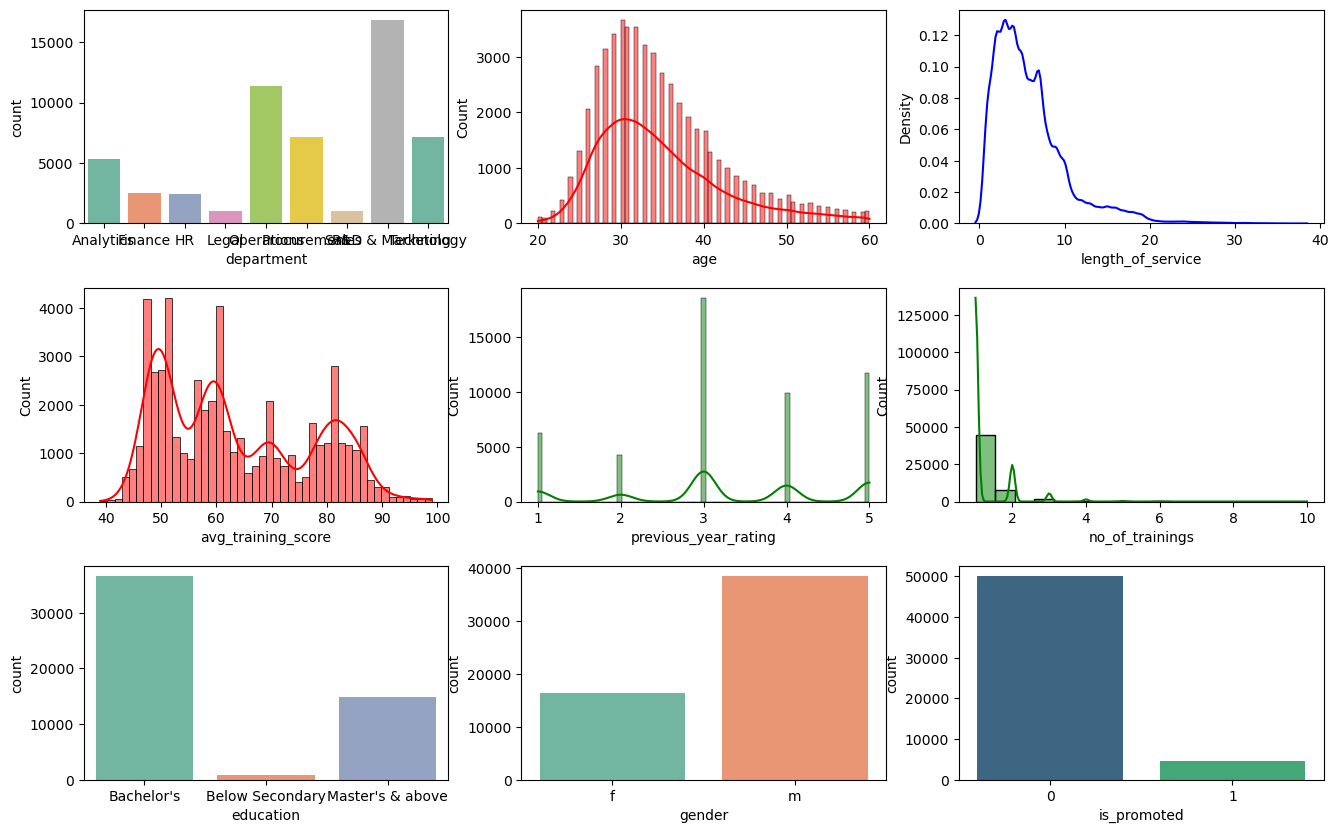

In [79]:
#EDA UNIVARIATEPLOTS

print(emp.isnull().sum())
#emp['previous_year_rating'] = emp['previous_year_rating'].fillna(0)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(16, 10))

sns.countplot(x='department', data=emp, ax=axes[0, 0], palette='Set2')
sns.histplot(emp['age'], kde=True, ax=axes[0, 1], color='red')
sns.kdeplot(emp['length_of_service'].dropna(), ax=axes[0, 2], color='blue')

sns.histplot(emp['avg_training_score'], kde=True, ax=axes[1, 0], color='red')
sns.histplot(emp['previous_year_rating'], kde=True, ax=axes[1, 1], color='green')
sns.histplot(emp['no_of_trainings'], kde=True, ax=axes[1, 2], color='green')

sns.countplot(x='education', data=emp, ax=axes[2, 0], palette='Set2')
sns.countplot(x='gender', data=emp, ax=axes[2, 1], palette='Set2')
sns.countplot(x='is_promoted', data=emp, ax=axes[2, 2], palette='viridis')

plt.subplots_adjust(hspace=0.3)
# plt.tight_layout()
plt.show()

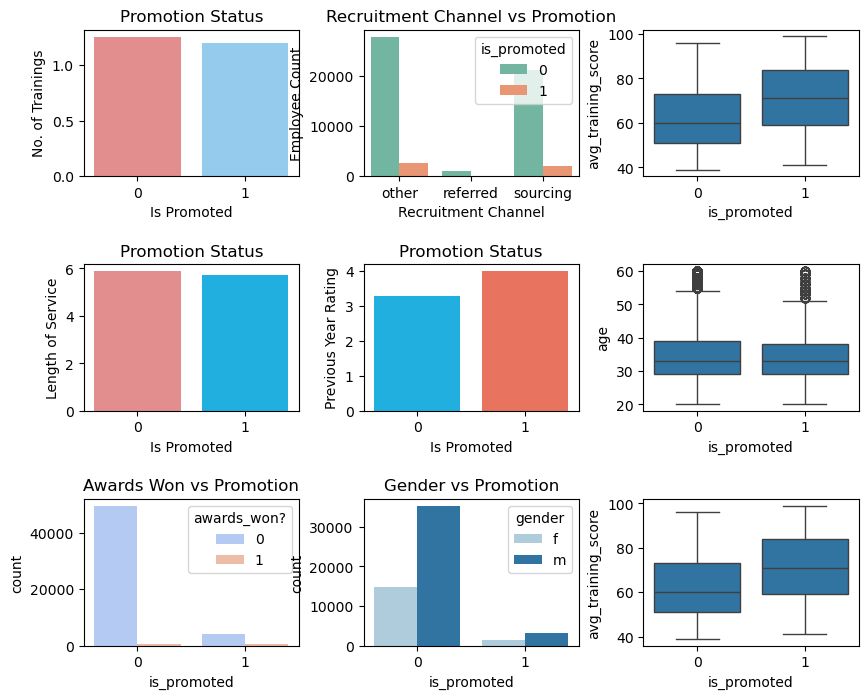

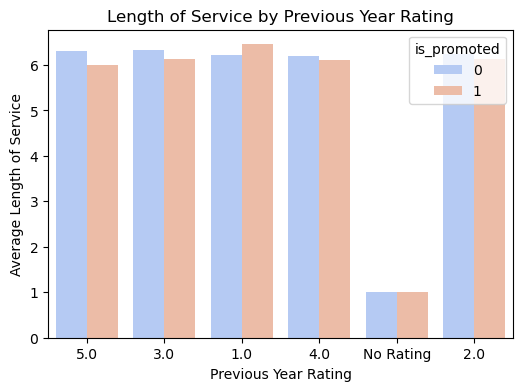

In [80]:
#EDA BIVARIATE PLOTS

fig, axes = plt.subplots(3, 3, figsize=(10, 8))  

# Plot 1
sns.barplot(x='is_promoted', y='no_of_trainings', data=emp, palette=['lightcoral', 'lightskyblue'], ci=None, ax=axes[0, 0])
axes[0, 0].set_title("Promotion Status")
axes[0, 0].set_xlabel("Is Promoted")
axes[0, 0].set_ylabel("No. of Trainings")

# Plot 2
sns.countplot(x='recruitment_channel', hue='is_promoted', data=emp, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title("Recruitment Channel vs Promotion")
axes[0, 1].set_xlabel("Recruitment Channel")
axes[0, 1].set_ylabel("Employee Count")

# Plot 3
sns.boxplot(x='is_promoted', y='avg_training_score', data=emp, ax=axes[0, 2])

# Plot 4
sns.barplot(x='is_promoted',y='length_of_service', data=emp, palette=['lightcoral', 'deepskyblue'], ci=None, ax=axes[1, 0])
axes[1, 0].set_title("Promotion Status")
axes[1, 0].set_xlabel("Is Promoted")
axes[1, 0].set_ylabel("Length of Service")

# Plot 5
sns.barplot(x='is_promoted', y='previous_year_rating', data=emp, palette=['deepskyblue', 'tomato'], ci=None, ax=axes[1, 1])
axes[1, 1].set_title("Promotion Status")
axes[1, 1].set_xlabel("Is Promoted")
axes[1, 1].set_ylabel("Previous Year Rating")

# Plot 6
sns.boxplot(x='is_promoted', y='age', data=emp, ax=axes[1, 2]
)

# Plot 7
sns.countplot(x='is_promoted', hue='awards_won?', data=emp, palette='coolwarm', ax=axes[2, 0])
axes[2, 0].set_title("Awards Won vs Promotion")

# Plot 8
sns.countplot(x='is_promoted', hue='gender', data=emp, palette='Paired', ax=axes[2, 1])
axes[2, 1].set_title("Gender vs Promotion")

# Plot 9
sns.boxplot(x='is_promoted', y='avg_training_score', data=emp, ax=axes[2, 2]
)

plt.subplots_adjust(hspace=0.6, wspace=0.3)
plt.show()

# Plot 10
#previous_year_rating vs length_of_service for is_promoted
#Most of the employees having no/null previous year rating have length of service less than equal to 1.
plt.figure(figsize=(6, 4))
sns.barplot(x=emp['previous_year_rating'].fillna('No Rating'), y=emp['length_of_service'], hue=emp['is_promoted'],
    data=emp, palette='coolwarm', ci=None)
plt.xlabel('Previous Year Rating')
plt.ylabel('Average Length of Service')
plt.title('Length of Service by Previous Year Rating')
plt.show()

In [81]:
#Split
X = emp.drop(['employee_id','is_promoted'], axis=1)
y = emp['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#segregating cat and num columns

cat_features = ['department',
    'region',
    'education',
    'gender',
    'previous_year_rating',            
    'recruitment_channel',
    'awards_won?']   # categorical cols

num_features = ['age',   
    'no_of_trainings',
    'length_of_service',
    'avg_training_score']   # numeric cols

#Impute
mode_Reason = X_train['education'].dropna().mode()[0]
X_train['education'].fillna(mode_Reason, inplace=True)
X_test['education'].fillna(mode_Reason, inplace=True)

X_train['previous_year_rating'] = X_train['previous_year_rating'].fillna(0)
X_test['previous_year_rating'] = X_test['previous_year_rating'].fillna(0)

print(X_train.shape)
print("\nMissing values AFTER replacing zeros:\n", X_train.isnull().sum())


(43846, 11)

Missing values AFTER replacing zeros:
 department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
dtype: int64


## 1. Single (Baseline) Models

In [85]:
#logistic regression

lg_pipeline = Pipeline([
    ('preprocess', ColumnTransformer([
        ('num', MinMaxScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_features)
    ])),
    ('model', LogisticRegression(random_state=10, max_iter=1000))
])

lg_pipeline.fit(X_train, y_train)

y_pred_train = lg_pipeline.predict(X_train)
print("Train Accuracy before SMOTE",accuracy_score(y_train, y_pred_train))
results = confusion_matrix(y_train, y_pred_train)
print ("Confusion Matrix of train set")
print(results)
rep = classification_report(y_train, y_pred_train) 
print ("Report of train data")
print(rep)

y_pred_test = lg_pipeline.predict(X_test)
print("Test Accuracy before SMOTE",accuracy_score(y_test, y_pred_test))
results = confusion_matrix(y_test, y_pred_test)
print ("Confusion Matrix of test set")
print(results)
rep = classification_report(y_test, y_pred_test) 
print ("Report of test data")
print(rep)

Train Accuracy before SMOTE 0.935706791953656
Confusion Matrix of train set
[[40044    42]
 [ 2777   983]]
Report of train data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     40086
           1       0.96      0.26      0.41      3760

    accuracy                           0.94     43846
   macro avg       0.95      0.63      0.69     43846
weighted avg       0.94      0.94      0.92     43846

Test Accuracy before SMOTE 0.9364167122787812
Confusion Matrix of test set
[[10039    15]
 [  682   226]]
Report of test data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.94      0.25      0.39       908

    accuracy                           0.94     10962
   macro avg       0.94      0.62      0.68     10962
weighted avg       0.94      0.94      0.92     10962



In [83]:
# Used SMOTE

print('Shape of train data', X_train.shape)
print('Shape of train data', y_train.shape)

#show class balance BEFORE SMOTE
print("Before SMOTE:", Counter(y_train))

# pipeline
lg_pipeline_smote = Pipeline([
    ('preprocess', ColumnTransformer([
        ('num', MinMaxScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_features)
    ])),
    ('smote', SMOTE(random_state=10)),
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])

# Fit pipeline
lg_pipeline_smote.fit(X_train, y_train)

# Predictions
y_pred_train = lg_pipeline_smote.predict(X_train)
y_pred_test  = lg_pipeline_smote.predict(X_test)

# Evaluation
print("Train Accuracy after SMOTE",accuracy_score(y_train, y_pred_train))
print("\nTrain Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print("Test Accuracy after SMOTE",accuracy_score(y_test, y_pred_test))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Shape of train data (43846, 11)
Shape of train data (43846,)
Before SMOTE: Counter({0: 40086, 1: 3760})
Train Accuracy after SMOTE 0.7620079368699539

Train Confusion Matrix:
 [[30899  9187]
 [ 1248  2512]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.86     40086
           1       0.21      0.67      0.32      3760

    accuracy                           0.76     43846
   macro avg       0.59      0.72      0.59     43846
weighted avg       0.90      0.76      0.81     43846

Test Accuracy after SMOTE 0.7599890530925014

Test Confusion Matrix:
 [[7728 2326]
 [ 305  603]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.85     10054
           1       0.21      0.66      0.31       908

    accuracy                           0.76     10962
   macro avg       0.58      0.72      0.58     10962
weighted avg       0.90      0.76      0.81     10962



###### Logistic Regression provides a stable and interpretable baseline with consistent train–test performance. But, its low precision for the promoted class shows that it is not able to capture complex, non-linear promotion patterns. So we do the Decision tree next.

In [37]:
#Decision trees
X_train_dt=X_train.copy()
y_train_dt=y_train.copy()
X_test_dt=X_test.copy()
y_test_dt=y_test.copy()

le = LabelEncoder()
for c in cat_features:    
    X_train_dt[c]=le.fit_transform(X_train_dt[c])
    X_test_dt[c]=le.transform(X_test_dt[c])

#print(X_train_dt.head(20))

#SMOTE on X_train_dt,y_train_dt
smote = SMOTE()
X_train_smote_dt, y_train_smote_dt = smote.fit_resample(X_train_dt,y_train_dt)

#DT using Gini
dt_gini = DecisionTreeClassifier(
    criterion='gini',
    random_state=10
)

dt_gini.fit(X_train_smote_dt, y_train_smote_dt)
y_train_pred_gini=dt_gini.predict(X_train_dt)
y_test_pred_gini = dt_gini.predict(X_test_dt)

print("\n--- Train Results ---")
print("Gini Train Accuracy",accuracy_score(y_train_dt, y_train_pred_gini))
print("Gini Train Confusion Matrix:\n", confusion_matrix(y_train_dt, y_train_pred_gini))
print(classification_report(y_train_dt, y_train_pred_gini))

print("\n--- Test Results ---")
print("Gini Test Accuracy",accuracy_score(y_test_dt, y_test_pred_gini))
print("Gini Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_gini))
print(classification_report(y_test, y_test_pred_gini))


#DT using Entropy
dt_ent = DecisionTreeClassifier(
    criterion='entropy',
    random_state=10
)

dt_ent.fit(X_train_smote_dt, y_train_smote_dt)
y_train_pred_ent=dt_ent.predict(X_train_dt)
y_test_pred_ent = dt_ent.predict(X_test_dt)

print("\n--- Train Results ---")
print("Ent Train Accuracy",accuracy_score(y_train_dt, y_train_pred_ent))
print("Ent Train Confusion Matrix:\n", confusion_matrix(y_train_dt, y_train_pred_ent))
print(classification_report(y_train_dt, y_train_pred_ent))

print("\n--- Test Results ---")
print("Ent Test Accuracy",accuracy_score(y_test_dt, y_test_pred_ent))
print("Ent Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_ent))
print(classification_report(y_test, y_test_pred_ent))


--- Train Results ---
Gini Train Accuracy 0.997878939926105
Gini Train Confusion Matrix:
 [[40006    80]
 [   13  3747]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40086
           1       0.98      1.00      0.99      3760

    accuracy                           1.00     43846
   macro avg       0.99      1.00      0.99     43846
weighted avg       1.00      1.00      1.00     43846


--- Test Results ---
Gini Test Accuracy 0.8227513227513228
Gini Test Confusion Matrix:
 [[8642 1412]
 [ 531  377]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     10054
           1       0.21      0.42      0.28       908

    accuracy                           0.82     10962
   macro avg       0.58      0.64      0.59     10962
weighted avg       0.88      0.82      0.85     10962


--- Train Results ---
Ent Train Accuracy 0.997878939926105
Ent Train Confusion Matrix:
 [[40006    80]
 [  

###### The Decision Tree achieves high training performance but there is a sharp drop in test performance, which means there is overfitting. This means we need to perform ensembel methods to reduce overfitting.

## 2. Ensemble Models


--- Bagging Classifier ---
Train Accuracy: 0.9972175340966108
Test Accuracy : 0.8771209633278598
OOB Score     : 0.932682233198623


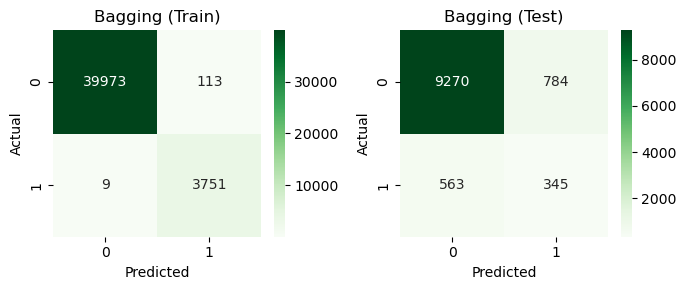

In [84]:
# BAGGING CLASSIFIER
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=10),
    n_estimators=50,
    random_state=10,
    oob_score=True
)

bag.fit(X_train_smote_dt, y_train_smote_dt)

# Predictions
y_pred_train_bag = bag.predict(X_train_dt)
y_pred_test_bag  = bag.predict(X_test_dt)

# Accuracy & OOB
print("\n--- Bagging Classifier ---")
print("Train Accuracy:", accuracy_score(y_train_dt, y_pred_train_bag))
print("Test Accuracy :", accuracy_score(y_test_dt, y_pred_test_bag))
print("OOB Score     :", bag.oob_score_)

# Confusion Matrices (Train vs Test)
fig, axes = plt.subplots(1, 2, figsize=(7,3))

sns.heatmap(confusion_matrix(y_train_dt, y_pred_train_bag), annot=True, fmt="d", cmap="Greens", ax=axes[0])
axes[0].set_title("Bagging (Train)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test_dt, y_pred_test_bag), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Bagging (Test)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

###### Bagging: The Bagging Classifier achieved high training accuracy and strong test accuracy also. The presence of a high out-of-bag (OOB) score indicates that the model is performing well. This suggests that bagging effectively controls overfitting while retaining the model’s ability to capture complex patterns. Bagging is suitable for this dataset because baseline Decision Tree models showed severe overfitting, indicating high variance in the data.

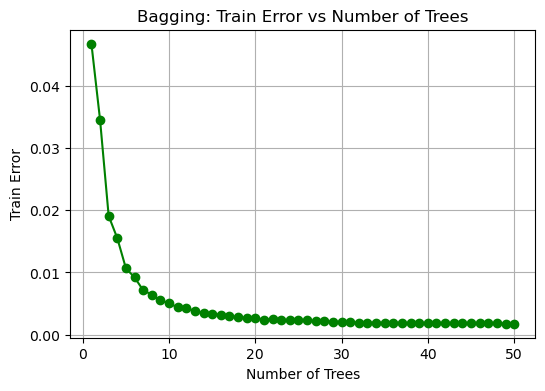

In [21]:
# BAGGING CLASSIFIER: TRAIN ERROR OVER NUMBER OF TREES
train_errors = []

# Loop over number of base estimators
for n in range(1, 51):
    bag = BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=10),
        n_estimators=n,
        random_state=10,
        bootstrap=True
    )
    
    # Fit on SMOTE training data
    bag.fit(X_train_smote_dt, y_train_smote_dt)
    
    # Predictions on the same training set
    y_train_pred = bag.predict(X_train_smote_dt)
    
    # Train error
    train_errors.append(1 - accuracy_score(y_train_smote_dt, y_train_pred))

# Plot
plt.figure(figsize=(6,4))
plt.plot(range(1, 51), train_errors, marker='o', color='green')
plt.xlabel("Number of Trees")
plt.ylabel("Train Error")
plt.title("Bagging: Train Error vs Number of Trees")
plt.grid(True)
plt.show()



--- AdaBoost Classifier ---
Train Accuracy: 0.8133239063996716
Test Accuracy : 0.8017697500456121
OOB Score     : Not available for AdaBoost


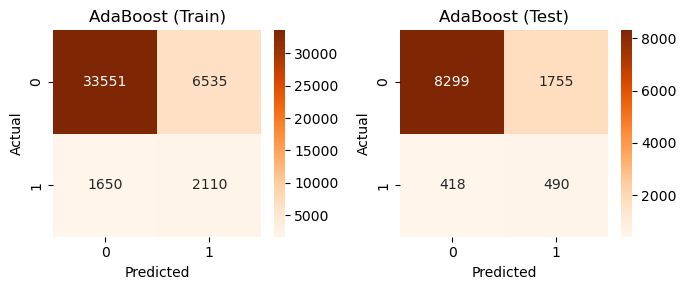

In [39]:
# ADABOOST CLASSIFIER

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=5, random_state=10),
    n_estimators=50,
    random_state=10
)
ada.fit(X_train_smote_dt, y_train_smote_dt)

# Predictions
y_pred_train_ada = ada.predict(X_train_dt)
y_pred_test_ada  = ada.predict(X_test_dt)

# Accuracy
print("\n--- AdaBoost Classifier ---")
print("Train Accuracy:", accuracy_score(y_train_dt, y_pred_train_ada))
print("Test Accuracy :", accuracy_score(y_test_dt, y_pred_test_ada))
print("OOB Score     : Not available for AdaBoost")


# Confusion Matrices (Train vs Test)
fig, axes = plt.subplots(1, 2, figsize=(7,3))

sns.heatmap(confusion_matrix(y_train_dt, y_pred_train_ada), annot=True, fmt="d", cmap="Oranges", ax=axes[0])
axes[0].set_title("AdaBoost (Train)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test_dt, y_pred_test_ada), annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("AdaBoost (Test)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

###### Adaboost (Boosting): AdaBoost achieves decent training and test accuracy, indicating controlled learning without overfitting. Boosting is suitable for this dataset because baseline models such as Logistic Regression showed underfitting, indicating high bias. AdaBoost sequentially focuses on previously misclassified observations, allowing the model to learn more complex patterns and improve predictions.

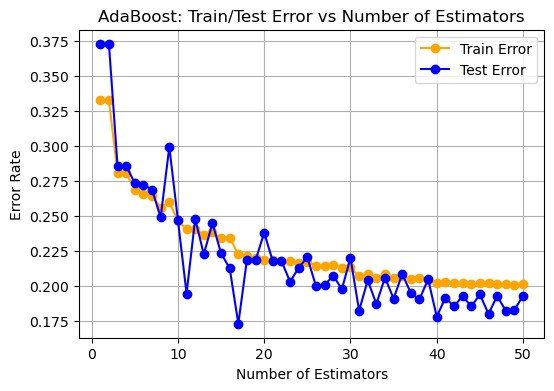

In [23]:
# ADABOOST: TRAIN & TEST ERROR OVER ESTIMATORS
train_errors = []
test_errors = []

# Train error
for i, y_pred in enumerate(ada.staged_predict(X_train_smote_dt)):
    train_errors.append(1 - accuracy_score(y_train_smote_dt, y_pred))

# Test error
for i, y_pred in enumerate(ada.staged_predict(X_test_dt)):
    test_errors.append(1 - accuracy_score(y_test_dt, y_pred))

# Plot error curves
plt.figure(figsize=(6,4))
plt.plot(range(1, len(train_errors)+1), train_errors, label='Train Error', marker='o', color='orange')
plt.plot(range(1, len(test_errors)+1), test_errors, label='Test Error', marker='o', color='blue')
plt.xlabel("Number of Estimators")
plt.ylabel("Error Rate")
plt.title("AdaBoost: Train/Test Error vs Number of Estimators")
plt.legend()
plt.grid(True)
plt.show()



--- Voting Classifier ---
Train Accuracy: 0.7798430871687269
Test Accuracy : 0.7349936143039592


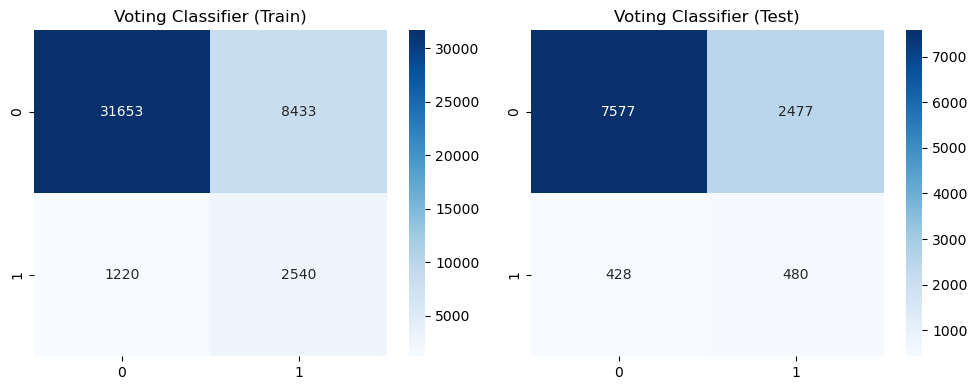

In [40]:
# Voting Classifier

from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

base_models = [
    ('lr',
        Pipeline([
            ('scaler', StandardScaler()),
            ('lr', LogisticRegression(max_iter=1000))
        ])),
    ('knn', 
        Pipeline([
            ('scaler', StandardScaler()),
            ('knn', KNeighborsClassifier(n_neighbors=5))
        ])),
    ('nb', GaussianNB()),
    ('dt1', DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=10)),
    ('dt2', DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=20)),
    ('dt3', DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=30))
]

vc = VotingClassifier(
    estimators=base_models,
    voting='soft'  # 'hard' or 'soft'
)

# Fit ensemble
vc.fit(X_train_smote_dt, y_train_smote_dt)

# Predictions
y_pred_train_dt = vc.predict(X_train_dt)
y_pred_test_dt  = vc.predict(X_test_dt)

    
print("\n--- Voting Classifier ---")
print("Train Accuracy:", accuracy_score(y_train_dt, y_pred_train_dt))
print("Test Accuracy :", accuracy_score(y_test, y_pred_test_dt))

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(confusion_matrix(y_train_dt, y_pred_train_dt), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Voting Classifier (Train)')
sns.heatmap(confusion_matrix(y_test, y_pred_test_dt), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Voting Classifier (Test)')
plt.tight_layout()
plt.show()

###### The Voting Classifier combines multiple diverse models to balance bias and variance and reduce dependency on any single learner. The Voting Classifier shows stable but lower test accuracy compared to stronger ensemble methods.

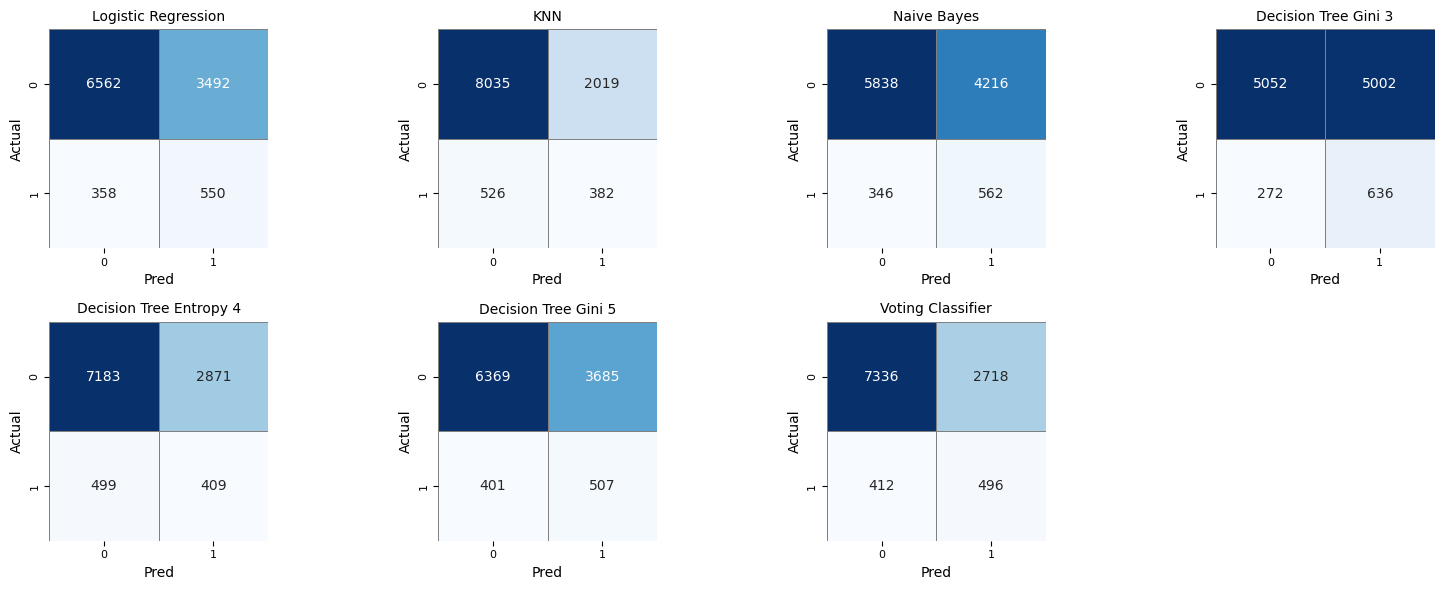

In [28]:
#All Voting classifier models

# Define pipelines first
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000))
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

models = [
    ('Logistic Regression', lr_pipeline),
    ('KNN', knn_pipeline),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree Gini 3', DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=10)),
    ('Decision Tree Entropy 4', DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=20)),
    ('Decision Tree Gini 5', DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=30)),
    ('Voting Classifier', vc)  # Already fitted VotingClassifier
]

# Fit base models (skip Voting Classifier)
for name, model in models[:-1]:
    model.fit(X_train_smote_dt, y_train_smote_dt)

# Predictions for all models
preds = [model.predict(X_test_dt) for _, model in models]

# Plot small confusion matrices side by side
fig, axes = plt.subplots(2, 4, figsize=(16,6))  # 2 rows, 4 columns
axes = axes.flatten()

for i, (name, _) in enumerate(models):
    cm = confusion_matrix(y_test, preds[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i], square=True,
                linewidths=0.5, linecolor='gray')
    axes[i].set_title(name, fontsize=10)
    axes[i].set_xlabel('Pred')
    axes[i].set_ylabel('Actual')
    axes[i].tick_params(axis='both', which='major', labelsize=8)

# Remove empty subplot (if any)
if len(models) < len(axes):
    for j in range(len(models), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


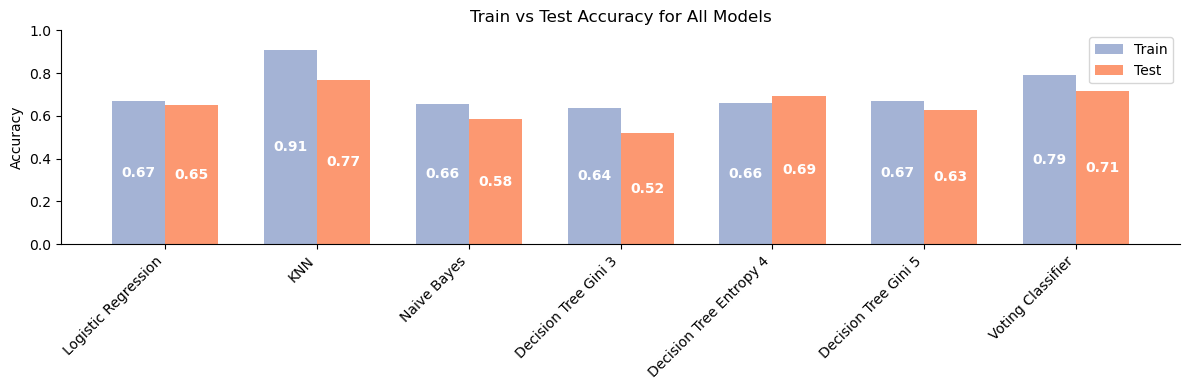

In [29]:
#Train vs Test Accuracy for All Models

plt.figure(figsize=(12,4))
bar_width = 0.35

# Model names and positions
model_names = [name for name, _ in models]
x_pos = range(len(model_names))

# Colors
train_color = "#8da0cb"   # soft blue
test_color  = "#fc8d62"   # soft orange

# Accuracy lists
train_acc = []
test_acc  = []

for name, model in models:
    # Fit only if not already fitted (skip Voting Classifier)
    if name != 'Voting Classifier':
        model.fit(X_train_smote_dt, y_train_smote_dt)
    # Append accuracies
    train_acc.append(accuracy_score(y_train_smote_dt, model.predict(X_train_smote_dt)))
    test_acc.append(accuracy_score(y_test_dt, model.predict(X_test_dt)))

# Plot bars
plt.bar(x_pos, train_acc, width=bar_width, color=train_color, label='Train', alpha=0.8)
plt.bar([i + bar_width for i in x_pos], test_acc, width=bar_width, color=test_color, label='Test', alpha=0.9)

# Add text inside bars
for i in x_pos:
    plt.text(i, train_acc[i]/2, f"{train_acc[i]:.2f}",
             ha='center', va='center', color='white', fontweight='bold')
    plt.text(i + bar_width, test_acc[i]/2, f"{test_acc[i]:.2f}",
             ha='center', va='center', color='white', fontweight='bold')

# X-axis labels
plt.xticks([i + bar_width/2 for i in x_pos], model_names, rotation=45, ha='right')
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for All Models')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()



Train Accuracy: 0.7648816311636181
Test Accuracy : 0.752964787447546


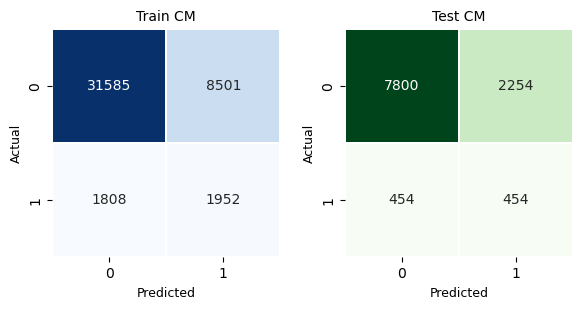

In [41]:
#Random forest (Bagging based)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest
rf = RandomForestClassifier(
    n_estimators=300,         
    max_depth=8,              
    min_samples_split=10,     
    min_samples_leaf=5,       
    random_state=10,          
    n_jobs=-1                
)

# Fit model on SMOTE training data
rf.fit(X_train_smote_dt, y_train_smote_dt)

# Prediction & Evaluation
y_train_pred = rf.predict(X_train_dt)
y_test_pred  = rf.predict(X_test_dt)

print("\nTrain Accuracy:", accuracy_score(y_train_dt, y_train_pred))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred))

# Confusion matrices
cm_train = confusion_matrix(y_train_dt, y_train_pred)
cm_test  = confusion_matrix(y_test, y_test_pred)

# Plot smaller, compact side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(6, 3))  # smaller figure

sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", ax=axes[0],
            cbar=False, square=True, linewidths=0.3, annot_kws={"size": 10})
axes[0].set_title("Train CM", fontsize=10)
axes[0].set_xlabel("Predicted", fontsize=9)
axes[0].set_ylabel("Actual", fontsize=9)

sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens", ax=axes[1],
            cbar=False, square=True, linewidths=0.3, annot_kws={"size": 10})
axes[1].set_title("Test CM", fontsize=10)
axes[1].set_xlabel("Predicted", fontsize=9)
axes[1].set_ylabel("Actual", fontsize=9)

plt.tight_layout()
plt.show()

###### Random forest: Random Forest extends bagging by adding feature-level randomness to improve the results and robustness, Random Forest shows balanced training and test accuracy with a relatively small performance gap.


Train Accuracy: 0.741367513570223
Test Accuracy : 0.7297938332421091


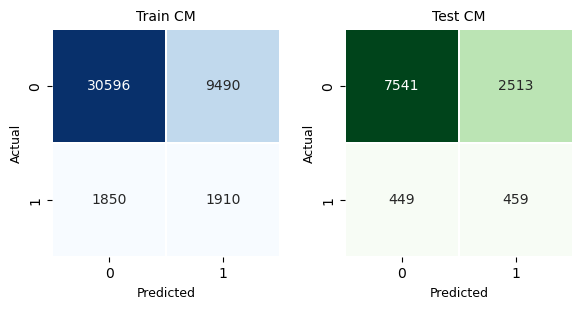

In [42]:
# Extra Trees (Random forest/Bagging based)

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Extra Trees
et = ExtraTreesClassifier(
    n_estimators=300,        # Number of trees
    max_depth=8,             # Control model complexity
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",     # Random subset of features
    bootstrap=False,         # Default: no bootstrap (key difference from RF)
    random_state=10,
    n_jobs=-1
)

# Fit model on SMOTE training data
et.fit(X_train_smote_dt, y_train_smote_dt)

# PREDICTION & EVALUATION
y_train_pred = et.predict(X_train_dt)
y_test_pred  = et.predict(X_test_dt)

print("\nTrain Accuracy:", accuracy_score(y_train_dt, y_train_pred))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred))

# CONFUSION MATRICES
cm_train = confusion_matrix(y_train_dt, y_train_pred)
cm_test  = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(6, 3))

sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", ax=axes[0],
            cbar=False, square=True, linewidths=0.3, annot_kws={"size": 10})
axes[0].set_title("Train CM", fontsize=10)
axes[0].set_xlabel("Predicted", fontsize=9)
axes[0].set_ylabel("Actual", fontsize=9)

sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens", ax=axes[1],
            cbar=False, square=True, linewidths=0.3, annot_kws={"size": 10})
axes[1].set_title("Test CM", fontsize=10)
axes[1].set_xlabel("Predicted", fontsize=9)
axes[1].set_ylabel("Actual", fontsize=9)

plt.tight_layout()
plt.show()


###### Extra trees: Extra Trees introduce additional randomness by selecting split thresholds randomly, further reducing variance. Extra Trees demonstrate slightly lower training and test accuracy compared to Random Forest.

## 3. Model Evaluation and Risk Assessment

In [86]:
#K-FOLD CV

# K-FOLD CROSS-VALIDATION STRATEGY
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=10
)

#Logistic regression pipeline
preprocessor= ColumnTransformer(
    transformers=[
            ('num', MinMaxScaler(), num_features),
            ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_features)
        ])

# DEFINE ENSEMBLE MODELS
models = {

    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=8,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=10,
        n_jobs=-1
    ),

    "Bagging (DT)": BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=10),
        n_estimators=50,
        random_state=10
    ),

    "AdaBoost": AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1, random_state=10),
        n_estimators=50,
        random_state=10
    ),

    "Voting Classifier": VotingClassifier(
        estimators=[
            ('logistic', make_pipeline(preprocessor, LogisticRegression()) ),
            ('knn',                Pipeline([
                    ('scaler', StandardScaler()),
                    ('knn', KNeighborsClassifier(n_neighbors=5))
                ])
            ),
            ('nb', GaussianNB()),
            ('dt1', DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=10)),
            ('dt2', DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=20)),
            ('dt3', DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=30))
        ]
    
    ),
    "Logistic Regression": make_pipeline(
        preprocessor,
        LogisticRegression()
    ),
    "Extra Tree": ExtraTreesClassifier(
    n_estimators=300,        # Number of trees
    max_depth=8,             # Control model complexity
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",     # Random subset of features
    bootstrap=False,         # Default: no bootstrap (key difference from RF)
    random_state=10,
    n_jobs=-1
    ),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# MODEL TRAINING + EVALUATION
cv_results = []

for name, model in models.items():                     # Loop over each ensemble model
    
    pipeline = Pipeline([                              # No global scaling apart from inside Voting pipelines
        ("model", model)
    ])
    
    # Perform K-Fold CV on SMOTE training data only
    cv_scores = cross_val_score(
        pipeline,
        X_train_smote_dt,
        y_train_smote_dt,
        cv=cv,
        scoring="accuracy",
        n_jobs=-1
    )
    
    # Fit model on full SMOTE training set
    pipeline.fit(X_train_smote_dt, y_train_smote_dt)
    
    # Training accuracy (overfitting check)
    train_acc = accuracy_score(
        y_train_smote_dt,
        pipeline.predict(X_train_smote_dt)
    )
    
    # Test accuracy (generalization performance)
    test_acc = accuracy_score(
        y_test,
        pipeline.predict(X_test_dt)
    )
    
    # Store evaluation results
    cv_results.append({
        "Model": name,
        "Mean CV Accuracy": cv_scores.mean(),
        "Std CV Accuracy": cv_scores.std(),
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc
    })

# RESULTS SUMMARY
cv_summary = (
    pd.DataFrame(cv_results)
    .sort_values(by="Mean CV Accuracy", ascending=False)
)

pd.set_option("display.float_format", lambda x: f"{x:.4f}")
display(cv_summary)


,Model,Mean CV Accuracy,Std CV Accuracy,Train Accuracy,Test Accuracy
1,Bagging (DT),0.9282,0.0011,0.9983,0.8771
6,Decision Tree,0.8865,0.0019,0.9984,0.8227
0,Random Forest,0.7561,0.0017,0.7587,0.7530
4,Logistic Regression,0.7518,0.0032,0.7519,0.7667
5,Extra Tree,0.7348,0.0033,0.7361,0.7298
3,Voting Classifier,0.7124,0.0015,0.7196,0.7156
2,AdaBoost,0.7058,0.0038,0.7038,0.6972


###### 
a. Cross-Validation Performance:<br>
Bagging (Decision Tree) achieves the highest mean CV accuracy (0.9282), indicating strong overall learning capability.<br>
Decision Tree also performs well in CV but is slightly weaker than bagging.<br>
Logistic Regression and Random Forest show moderate CV performance, suggesting simpler or more conservative learning.<br>
Voting Classifier and AdaBoost have lower mean CV accuracy, indicating limited predictive strength.<br>
Interpretation:<br>
Bagging-based models outperform others in cross-validation, whereas Random forest shows stability in train test results.

b. Stability Across Folds (Standard Deviation):<br>
Bagging (DT) and Decision Tree show very low CV variance, meaning performance is consistent across folds.<br>
Logistic Regression and Random Forest also demonstrate stable behavior.<br>
Voting Classifier has the highest CV standard deviation, indicating unstable performance across folds.<br>
Interpretation:<br>
Bagging demonstrates both high performance and strong stability.

c. Train vs Validation Behavior (Overfitting Detection):<br>
Decision Tree shows very high training accuracy but a noticeable drop in test accuracy that means clear overfitting.<br>
Bagging (DT) also has high training accuracy, but the gap to test accuracy is significantly smaller, showing controlled variance.<br>
Logistic Regression and Random Forest show minimal train–test gaps that means low overfitting, but also lower peak performance.<br>
Extra Trees slightly underfit, as seen from uniformly lower accuracies.<br>

d. Performance on Unseen Test Data:<br>
Bagging (DT) achieves the highest test accuracy (0.8771).<br>
Decision Tree performs reasonably but with higher risk due to overfitting.<br>
Logistic Regression and Random Forest provide stable but lower test performance.<br>
Voting Classifier and AdaBoost underperform on unseen data.<br>

#### Final recommendation

After digging into the data, testing some baseline models, trying out different ensemble techniques, and checking how they all performed, I’d go with the **Random Forest** as the model to use for NexaCore Solutions promotion decision support system. It just gave the most reliable results.

I. Evidence from EDA: <br>
a. There is complex and non linear relationship between promotion and key feafures like training score, previous year ratings, etc.<br>
b. There is class imbalance in is_promoted, which was addressed using SMOTE.<br>
c. Most of the employees having no/null previous year rating have length of service less than equal to 1.<br>

II. Comparative Performance Across Models:<br>
a. Logistic Regression provided stable and interpretable results but showed limited predictive power.<br>
b. Decision Trees achieved high training accuracy but severely overfit, posing unacceptable deployment risk.<br>
c. Boosting and Voting ensembles improved certain aspects of performance but showed large train test gap or reduced overall accuracy.<br>
d. Bagging-based models, particularly the Bagging Classifier, consistently delivered the strongest performance.<br>

Random Forest, in contrast, demonstrated:
Consistent performance across training, cross-validation, and test sets, 0.7587	in Train Accuracy and 0.7530 in Test accuracy, 0.7561 Mean CV Accuracy and 0.0017	Std CV Accuracy.
Given the extreme cost of incorrect promotion decisions and the no-retraining constraint, Random Forest is preferred due to its minimal variance and highly predictable behavior, even at the cost of some accuracy.

III. Overfitting and Stability Check<br>
Random Forest showed:
Minimal difference between training and test accuracy, indicating negligible overfitting.<br>
Low cross-validation standard deviation, reflecting strong stability across folds.<br>
Controlled learning behavior despite the presence of SMOTE-generated samples.<br>
Unlike single trees, logistic regression or high-capacity ensembles, Random Forest avoids memorization by combining bootstrap sampling with feature-level randomness, making it less sensitive to noise and data fluctuations.

IV. Suitability Under One-Shot, High-Cost Constraints:<br>
Given that the system cannot be retrained post-deployment:<br>
Predictability and robustness are more critical than maximizing peak accuracy.<br>
Models exhibiting high variance or aggressive fitting pose unacceptable operational risk.<br>
Random Forest offers: Reliable, repeatable performance, strong generalization to unseen data and reduced risk of unexpected failures in production.